In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# The problem with this project is to examine a dataset from the Titanic. This was a ship, infamous for crashing on its
# maiden voyage. Is there a coorelation between any variables and if the passenger survived? My hypothesis is that the 
# passenger class will most accurately predict if a passenger perished or not.

In [38]:
df = pd.read_csv(r'C:\Users\maggi\OneDrive\Documents\Documents\Classes\ISM 4300\titanic.csv')
print(df)
df1 = df.dropna()
print(df1)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

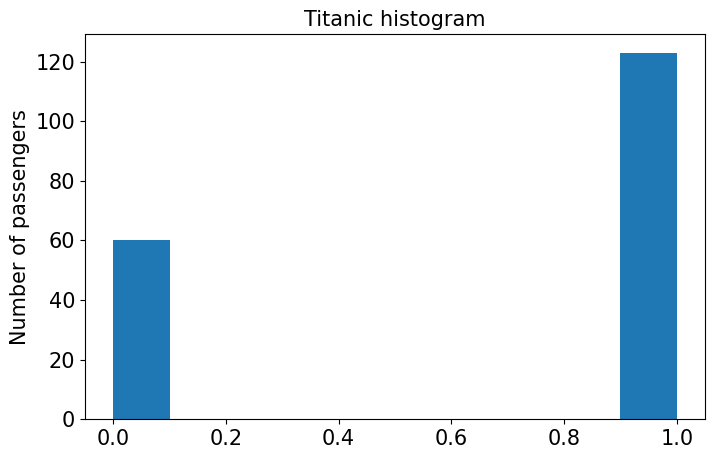

In [61]:
plt.figure(figsize = (8,5))
plt.hist(df1['Survived'], color = 'Tab:blue')
plt.title('Titanic histogram', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Number of passengers', fontsize = 15)
plt.show()

In [59]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


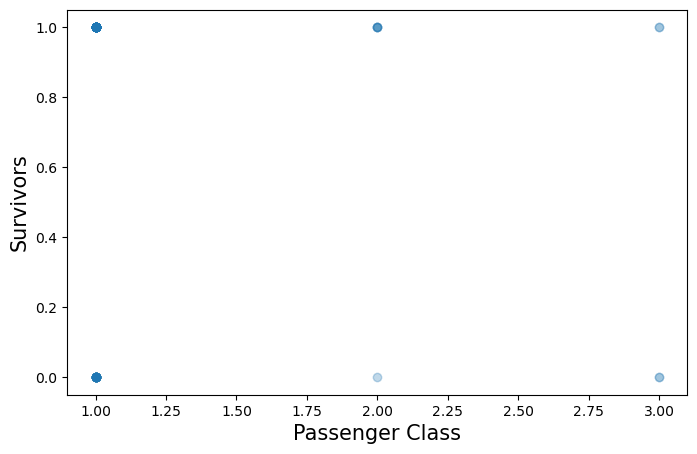

In [58]:
plt.figure(figsize = (8,5))
plt.scatter(x = df1['Pclass'], y = df1['Survived'], color = 'Tab:blue', alpha = 0.1)
plt.xlabel('Passenger Class', fontsize = 15)
plt.ylabel('Survivors', fontsize = 15)
plt.show()

In [62]:
features = ['Pclass'] #feature names
X = df1[features]
Y = df1['Fare']# try with Pclass to Fare, Pclass to survived

In [63]:
X.head()

,Pclass
1,1
3,1
6,1
10,3
11,1


In [64]:
Y.head()

1     71.2833
3     53.1000
6     51.8625
10    16.7000
11    26.5500
Name: Fare, dtype: float64

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [66]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

In [67]:
my_linear_regression.coef_

array([-43.99687446])

In [68]:
print("R^2 = ", my_linear_regression.score(X_train,Y_train))
print('The intercept of (b_0) is {}'.format(my_linear_regression.intercept_))
print('The coef of (b_1) is {}'.format(my_linear_regression.coef_[0]))
print('The coef of (b_2) is {}'.format(my_linear_regression.coef_[1]))

R^2 =  0.08993798988404655
The intercept of (b_0) is 129.56163650556385
The coef of (b_1) is -43.996874456070415


IndexError: index 1 is out of bounds for axis 0 with size 1

In [69]:
test_model = my_linear_regression.predict(X_test)
test_model

array([41.56788759, 85.56476205, 85.56476205, 85.56476205, 85.56476205,
       85.56476205, 85.56476205, 85.56476205, 85.56476205, 85.56476205,
       41.56788759, 85.56476205, 85.56476205, 85.56476205, 85.56476205,
       41.56788759, 85.56476205, 85.56476205, -2.42898686, 85.56476205,
       85.56476205, 85.56476205, 85.56476205, 85.56476205, 85.56476205,
       85.56476205, 85.56476205, 85.56476205, 85.56476205, 85.56476205,
       85.56476205, 41.56788759, 85.56476205, 85.56476205, 85.56476205,
       85.56476205, 85.56476205])

In [70]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, test_model))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, test_model))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, test_model)))

Mean Absolute Error:  43.494737444170624
Mean Squared Error:  4012.7489154935324
Root Mean Squared Error:  63.346262048312944


In [ ]:
# While it is hard to get an exact picture for the data, it is clear that the survival rate drastically increases as people
# purchase a more expensive ticket and thus have a higher passenger class.In oher words, the more a customer spent on their
# ticket, the more likely they wereto surive. In the future, I would use a different model as linear appoximation is not 
# the best for catagoical data.